In [2]:
import torch

In [3]:
torch.__version__

'2.2.1+cu121'

In [4]:
from torch import nn #Importing neural net
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Compose,Lambda
import matplotlib.pyplot as plt

In [5]:
training_set = datasets.FashionMNIST('data', train=True, transform=ToTensor(), download=True)
testing_set=datasets.FashionMNIST('data', train=False, transform=ToTensor(), download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 9467081.20it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 158295.56it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2921743.10it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6455090.28it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
training_loader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)
testing_loader = torch.utils.data.DataLoader(testing_set, batch_size=64, shuffle=False)

In [14]:
len(training_loader.dataset)

60000

In [7]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
class NeuralNetworks(nn.Module):
  def __init__(self):
    super(NeuralNetworks,self).__init__()
    self.flatten=nn.Flatten()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [12]:
model=NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
loss_fn = nn.CrossEntropyLoss()
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [15]:
def train(dataloader,model,loss_fn,optimizer):
  size=len(dataloader.dataset)
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    #Predicting
    pred=model(X)
    loss=loss_fn(pred,y)
    #Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100==0:
      loss,current=loss.item(),batch*len(X)
      print(f"loss:{loss:.>7f} [{current:>5d}/{size:>5d}]")

In [16]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      pred=model(X)
      test_loss+=loss_fn(pred,y).item()
      correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
  test_loss/=num_batches
  correct/=size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [18]:
## Start training

epochs = 10

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  train(training_loader, model, loss_fn, optimizer)
  test(testing_loader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss:2.290712 [    0/60000]
loss:2.170606 [ 6400/60000]
loss:1.872707 [12800/60000]
loss:1.509184 [19200/60000]
loss:1.148524 [25600/60000]
loss:1.016704 [32000/60000]
loss:0.897672 [38400/60000]
loss:0.850871 [44800/60000]
loss:0.944733 [51200/60000]
loss:0.855385 [57600/60000]
Test Error: 
 Accuracy: 71.4%, Avg loss: 0.788314 

Epoch 2
-------------------------------
loss:0.847923 [    0/60000]
loss:0.731288 [ 6400/60000]
loss:0.768251 [12800/60000]
loss:0.683345 [19200/60000]
loss:0.661853 [25600/60000]
loss:0.588080 [32000/60000]
loss:0.563616 [38400/60000]
loss:0.645629 [44800/60000]
loss:0.646898 [51200/60000]
loss:0.643571 [57600/60000]
Test Error: 
 Accuracy: 78.4%, Avg loss: 0.629482 

Epoch 3
-------------------------------
loss:0.575020 [    0/60000]
loss:0.616429 [ 6400/60000]
loss:0.641464 [12800/60000]
loss:0.537577 [19200/60000]
loss:0.796987 [25600/60000]
loss:0.521116 [32000/60000]
loss:0.549235 [38400/60000]
loss:0.444310 [44800

In [19]:
torch.save(model.state_dict(),"mymodel.pth")

In [21]:
model=NeuralNetworks()
model.load_state_dict(torch.load("mymodel.pth"))
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [22]:

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [23]:
model.eval()

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [30]:
x, y = testing_set[10][0], testing_set[10][1]

In [31]:
y

4

In [32]:
with torch.no_grad():
  pred=model(x)
  predicted,actual=classes[pred.argmax(1)],classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Coat", Actual: "Coat"


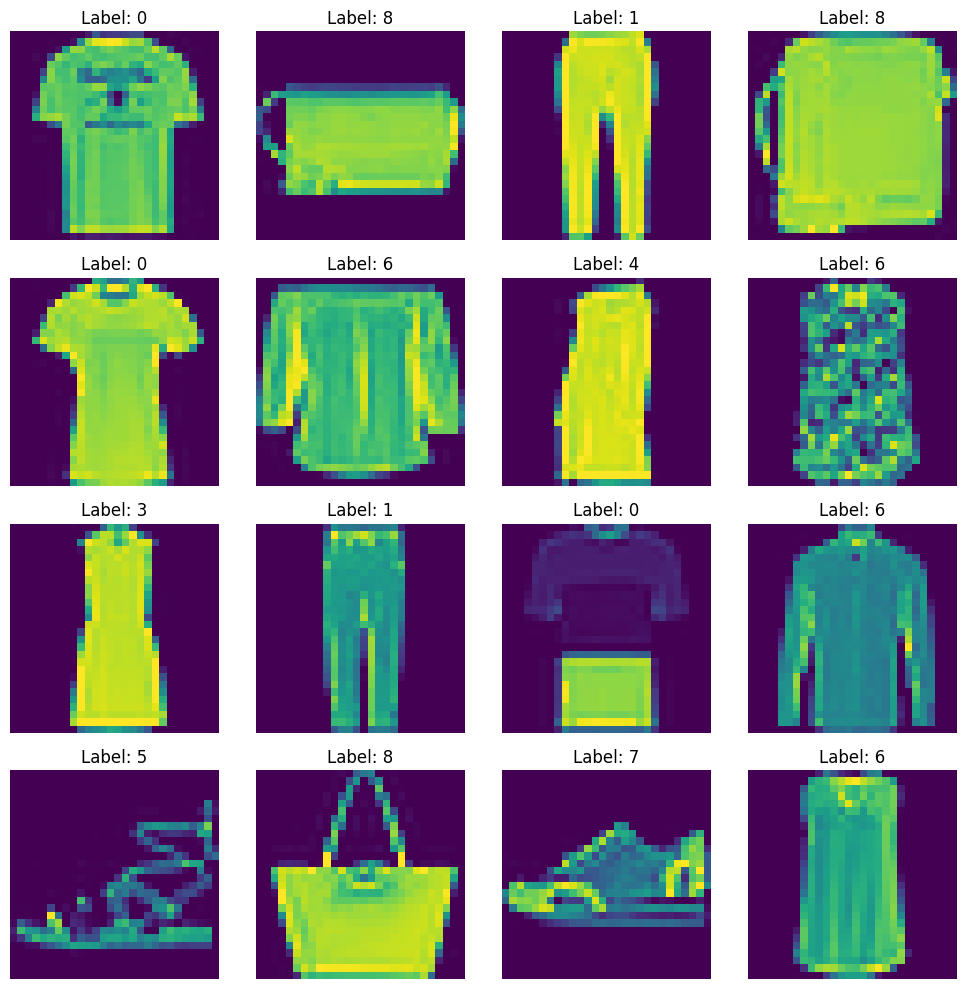

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# Loop through the training dataloader to get a batch
for images, labels in training_loader:
    break  # Get the first batch and exit loop
  # Convert the images to numpy arrays
images = images.numpy()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### With custom data:

 * https://www.kaggle.com/code/tirendazacademy/cats-dogs-classification-with-pytorch


- https://www.kaggle.com/code/manzoormahmood/transfer-learning-using-resnet50-and-pytorch